# Calculation general flare distributions in $\mu$

In [43]:
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt


In [51]:
# general distribution for area 
def rice_dist(x, sigma, nu):
    x = np.abs(x)
    return x / sigma**2 * np.exp( - (x**2 + nu **2 ) / (2 * sigma **2)) * sc.iv(0, (x * nu / sigma**2))

sigma_fit, nu_fit = (9.02769086 / 180 * np.pi, 10.48768514 / 180 * np.pi)

def rho(alpha, err=0.00001):
    return rice_dist(np.pi / 2 - alpha, sigma_fit, nu_fit) / 2 / np.pi / (np.sin(alpha) + err) / 2 
            # fit of dist when integrated over phi and absolute value so accounting for that

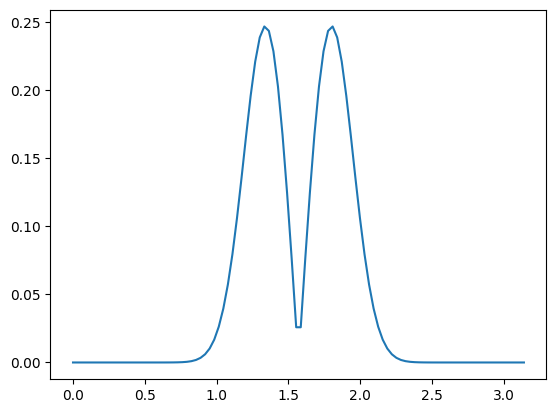

In [52]:
alpha = np.linspace(0, np.pi, 100)
plt.plot(alpha, rho(alpha))

In [46]:
f = lambda x: rice_dist(x, sigma_fit, nu_fit)

quad(f,0, np.pi)

(1.0, 2.5350408352359244e-09)

Therefore density is $$\rho_\mu(\mu) = \frac{2}{\sin \theta} \int_{[0, 2\pi]}d\phi \rho (\alpha(\theta, \phi))
.$$
where
$$
\cos \alpha = \sin \tau \sin \theta \cos \phi +\cos \theta \cos \tau  $$
and $\mu = \cos \theta$

In [47]:
# general distribution for given tau
from scipy.integrate import quad


def get_alpha(tau, theta, phi):
    return np.arccos( np.sin( tau ) * np.sin(theta) * np.cos(phi) + np.cos(tau) * np.cos(theta))

def rho_mu(mu, tau):
    theta = np.arccos(mu)
    I = lambda phi: rho(get_alpha(tau, theta, phi))
    return 2 / np.sin(theta) * quad(I, 0, 2*np.pi)[0]

def rho_mus(mus, tau):
    return [ rho_mu(mu,tau) for mu in mus]
    


In [48]:
get_alpha(np.pi/2, np.pi/2, np.pi)

3.141592653589793

0.0 (1.0444908782659177, 3.462456219633335e-14)
0.39269908169872414 (1.0907514864862597, 1.582752660782452e-08)
0.7853981633974483 (1.2641461230970454, 5.576272776863789e-10)
1.1780972450961724 (1.8120804432512356, 1.2667302984326057e-08)
1.5707963267948966 (1.867418082176282, 2.723090670020531e-10)


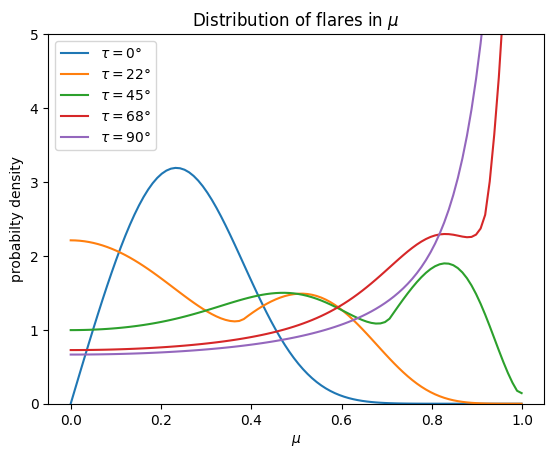

In [49]:
rho_mu_of_tau = lambda tau : lambda mu : rho_mu(mu, tau)


mu = np.linspace(0,0.999, 100)

for tau in np.linspace(0,np.pi/2, 5):
    plt.plot(mu, rho_mus(mu, tau), label=fr'$\tau=${round(tau*180/np.pi)}°')
    print(tau, quad(rho_mu_of_tau(tau), 0, 1))
    
plt.ylim(0,5)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()

0.0 (1.0, 4.7601845137482763e-14)
0.39269908169872414 (0.9999999940992111, 9.73158285830599e-09)
0.7853981633974483 (0.9999999982520317, 4.1601957502183766e-09)
1.1780972450961724 (0.9999999942453212, 1.054938818745321e-09)
1.5707963267948966 (1.000000000000071, 5.994959417776613e-09)


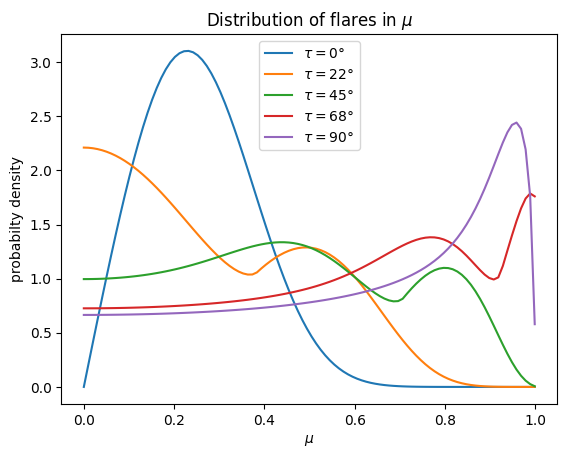

In [50]:
rho_mu_of_tau = lambda tau : lambda mu : rho_mu(mu, tau)* (1-mu**2)**0.5

def rho_mus2(mus, tau):
    return [ rho_mu(mu,tau) * (1-mu**2)**0.5 for mu in mus]

mu = np.linspace(0,0.999, 100)

for tau in np.linspace(0,np.pi/2, 5):
    plt.plot(mu, rho_mus2(mu, tau), label=fr'$\tau=${round(tau*180/np.pi)}°')
    print(tau, quad(rho_mu_of_tau(tau), 0, 1))

# plt.ylim(0,5)
plt.title(r"Distribution of flares in $\mu$")
plt.xlabel(r"$\mu$")
plt.ylabel("probabilty density")
plt.legend()